In [14]:
from IPython.display import display, HTML
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("raw_data.csv")
df = df.drop(columns=["Sorszám", "Alapbetegségek"])
df.drop(df.index[0:215],0,inplace=True)
df = df.reindex(index=df.index[::-1])
df.reset_index(drop=True, inplace=True)
df.tail(5)

C:\Users\bornalid\AppData\Local\Temp/ipykernel_2892/1212561128.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.index[0:215],0,inplace=True)


,Nem,Kor
32166,Nõ,89
32167,Nõ,78
32168,Férfi,70
32169,Nõ,85
32170,Férfi,70


In [3]:
read_file = pd.DataFrame(pd.read_excel("dates.xlsx"))
read_file.to_csv ("dates.csv",
                  index = None,
                  header=True)
df1 = pd.read_csv("dates.csv")
df1 = pd.read_csv("dates.csv", usecols=['Dátum', 'Elhunytak', 'New Deaths'])
df1.drop(df1.index[0:12],0,inplace=True)
df1['Elhunytak'] = df1['Elhunytak'].fillna(0)
df1['New Deaths'] = df1['New Deaths'].fillna(0)
df1.reset_index(drop=True, inplace=True)
print(df1.head())
len(df1)

        Dátum  Elhunytak  New Deaths
0  2020-03-16        1.0         1.0
1  2020-03-17        1.0         0.0
2  2020-03-18        1.0         0.0
3  2020-03-19        1.0         0.0
4  2020-03-20        4.0         3.0


C:\Users\bornalid\AppData\Local\Temp/ipykernel_2892/1748439750.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1.drop(df1.index[0:12],0,inplace=True)


610

In [4]:
repeat = df1["New Deaths"]
data = pd.DataFrame(np.repeat(df1.values, repeat,axis=0), columns= df1.columns)
data.head()

,Dátum,Elhunytak,New Deaths
0,2020-03-16,1.0,1.0
1,2020-03-20,4.0,3.0
2,2020-03-20,4.0,3.0
3,2020-03-20,4.0,3.0
4,2020-03-22,6.0,2.0


In [5]:
new_data = pd.merge(data, df, left_index=True, right_index=True)
new_data = new_data.drop(columns=['Elhunytak', 'New Deaths'])
new_data["Dátum"]=pd.to_datetime(new_data["Dátum"])
new_data.set_index("Dátum", inplace=True)
print(new_data.head())
len(new_data)

              Nem  Kor
Dátum                 
2020-03-16     Nő   76
2020-03-20     Nő   65
2020-03-20  Férfi   74
2020-03-20  Férfi   79
2020-03-22  Férfi   68


32171

In [6]:
df1["Dátum"]=pd.to_datetime(df1["Dátum"])
df1.set_index("Dátum", inplace=True)
data_with_dates=pd.merge(df1,new_data, how='inner', left_index=True, right_index=True)
data_with_dates.to_csv("data_with_dates.csv")
data_with_dates.reset_index(level=0, inplace=True)

In [7]:
data_with_dates.head(10)

,Dátum,Elhunytak,New Deaths,Nem,Kor
0,2020-03-16,1.0,1.0,Nő,76
1,2020-03-20,4.0,3.0,Nő,65
2,2020-03-20,4.0,3.0,Férfi,74
3,2020-03-20,4.0,3.0,Férfi,79
4,2020-03-22,6.0,2.0,Férfi,68
5,2020-03-22,6.0,2.0,Nő,41
6,2020-03-23,8.0,2.0,Férfi,38
7,2020-03-23,8.0,2.0,Férfi,53
8,2020-03-24,9.0,1.0,Nő,90
9,2020-03-25,10.0,1.0,Férfi,75


In [8]:
bins= pd.DataFrame(pd.cut(x=data_with_dates['Kor'], bins=[0, 9, 19, 29, 39, 49,59,69, 79, 89,99, 109]))
bins.rename(columns={'Kor' :'Age'},inplace=True)
bins


,Age
0,"(69, 79]"
1,"(59, 69]"
2,"(69, 79]"
3,"(69, 79]"
4,"(59, 69]"
...,...
32166,"(79, 89]"
32167,"(69, 79]"
32168,"(69, 79]"
32169,"(79, 89]"


In [9]:
data_with_dates=pd.concat((data_with_dates,bins), axis = 1)
data_with_dates.drop(columns=["Elhunytak","New Deaths"], inplace = True)
data_with_dates.head(20)

,Dátum,Nem,Kor,Age
0,2020-03-16,Nő,76,"(69, 79]"
1,2020-03-20,Nő,65,"(59, 69]"
2,2020-03-20,Férfi,74,"(69, 79]"
3,2020-03-20,Férfi,79,"(69, 79]"
4,2020-03-22,Férfi,68,"(59, 69]"
5,2020-03-22,Nő,41,"(39, 49]"
6,2020-03-23,Férfi,38,"(29, 39]"
7,2020-03-23,Férfi,53,"(49, 59]"
8,2020-03-24,Nő,90,"(89, 99]"
9,2020-03-25,Férfi,75,"(69, 79]"


In [10]:
rep = pd.DataFrame(data_with_dates.groupby(pd.Grouper(freq='W', key='Dátum'))['Nem'].count())
rep.reset_index(inplace=True)
rep1 = rep["Nem"]
mydata = pd.DataFrame(np.repeat(rep.values, rep1,axis=0), columns= rep.columns)
mydata["Date"] = mydata["Dátum"] 
mydata["Count"] = mydata["Nem"]
mydata.drop(columns=["Dátum", "Nem"], inplace = True)
mydata.head()

,Date,Count
0,2020-03-22,6
1,2020-03-22,6
2,2020-03-22,6
3,2020-03-22,6
4,2020-03-22,6


In [11]:
date_age=pd.merge(mydata, data_with_dates, how='inner', left_index=True, right_index=True)
date_age.head()
date_age.drop(columns=["Dátum"], inplace = True)
date_age["Date"] = date_age["Date"].dt.date
date_age.drop(columns=["Count", "Nem", "Kor" ], inplace = True)

date_age.head(10)

,Date,Age
0,2020-03-22,"(69, 79]"
1,2020-03-22,"(59, 69]"
2,2020-03-22,"(69, 79]"
3,2020-03-22,"(69, 79]"
4,2020-03-22,"(59, 69]"
5,2020-03-22,"(39, 49]"
6,2020-03-29,"(29, 39]"
7,2020-03-29,"(49, 59]"
8,2020-03-29,"(89, 99]"
9,2020-03-29,"(69, 79]"


In [12]:
aggregated_data = date_age.groupby( list(date_age))[['Date']].count()
#aggregated_data.head(50)
aggregated_data = aggregated_data.unstack(level = 0)
aggregated_data.to_csv("aggregated_data.csv")
aggregated_data = aggregated_data.reindex(index=aggregated_data.index[::-1])
#data_with_dates(['Date', 'Age']).count()
#means = data_with_dates.join(data_with_dates).groupby( list(data_with_dates) )
#means = means.unstack(level = 0) 
aggregated_data.head()

Date                                                         \
Date      2020-03-22 2020-03-29 2020-04-05 2020-04-12 2020-04-19 2020-04-26   
Age                                                                           
(99, 109]          0          0          0          0          0          0   
(89, 99]           0          1          3          8         12         11   
(79, 89]           0          2         10         18         35         38   
(69, 79]           3          2          4         23         26         21   
(59, 69]           2          0          3         12         13         10   

                                                       ...             \
Date      2020-05-03 2020-05-10 2020-05-17 2020-05-24  ... 2021-09-19   
Age                                                    ...              
(99, 109]          0          0          0          0  ...          0   
(89, 99]           5         10          4          2  ...          4   
(79, 89]          19         27         14         10  ...         15   
(69, 79]          26         24         11         11  ...          7   
(59, 69]          12          9          7          9  ...          4   

                                                                             \
Date      2021-09-26 2021-10-03 2021-10-10 2021-10-17 2021-10-24 2021-10-31   
Age                                                                           
(99, 109]          0          0          0          0          0          1   
(89, 99]           2          7          5          8          5         25   
(79, 89]          10         14         16         14         40         60   
(69, 79]           5         11         22         23         43         68   
(59, 69]           8          9         20         15         26         50   

                                            
Date      2021-11-07 2021-11-14 2021-11-21  
Age                                         
(99, 109]          2          2          0  
(89, 99]          38         45         16  
(79, 89]         114        195         70  
(69, 79]         136        196         96  
(59, 69]          98        157         61  

[5 rows x 87 columns]

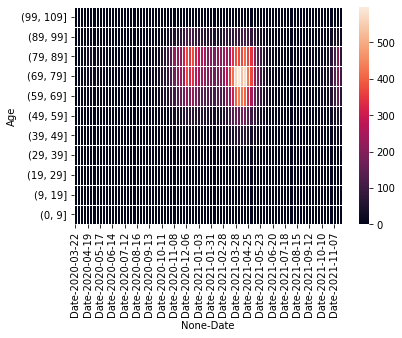

In [15]:
ax = sns.heatmap(aggregated_data, linewidths=.5)